# Chapter 1 - The Machine Learning Landscape
<br>


### Sampling noise / Sampling bias
It is crucial to use a training set that is representative of the cases you want to generalize to. This is often harder than it sounds: if the sample is too small, you will have **sampling noise** (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called **sampling bias**.

### Overfitting
Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:
- To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
- To gather more training data
- To reduce the noise in the training data (e.g., fix data errors and remove outliers)

Constraining a model to make it simpler and reduce the risk of overfitting is called **regularization**.

### Underfitting 
As you might guess, underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.
<br>The main options to fix this problem are:
- Selecting a more powerful model, with more parameters
- Feeding better features to the learning algorithm (feature engineering)
- Reducing the constraints on the model (e.g., reducing the regularization hyperparameter)

In [22]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import os
datapath = os.path.join("datasets", "lifesat", "")

In [23]:
datapath

'datasets\\lifesat\\'

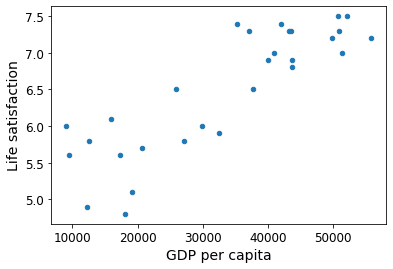

[[5.96242338]]


In [24]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',', 
                             delimiter='\t', encoding='latin1', na_values="n/a")

# This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. 
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# np.c_[np.array([1,2,3]), np.array([4,5,6])]
# array([[1, 4],
#        [2, 5],
#        [3, 6]])

# np.c_[np.array([1,2,3])]
# array([[1],
#        [2],
#        [3]])

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[5.96242338]]

## Questions

#### 1. How would you define Machine Learning?

Machine Learning is about building systems that can learn from data. Learning
means getting better at some task, given some performance measure.

#### 2. Can you name four types of problems where it shines?

Machine Learning is great for complex problems for which we have no algorithmic
solution, to replace long lists of hand-tuned rules, to build systems that adapt
to fluctuating environments, and finally to help humans learn (e.g., data mining).

#### 3. What is a labeled training set?

A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.

#### 4. What are the two most common supervised tasks?

The two most common supervised tasks are regression and classification.

#### 5. Can you name four common unsupervised tasks?

Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.

#### 6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

Reinforcement Learning is likely to perform best if we want a robot to learn to
walk in various unknown terrains since this is typically the type of problem that
Reinforcement Learning tackles. It might be possible to express the problem as a
supervised or semisupervised learning problem, but it would be less natural.

#### 7. What type of algorithm would you use to segment your customers into multiple groups?

If you don’t know how to define the groups, then you can use a clustering algorithm
(unsupervised learning) to segment your customers into clusters of similar
customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised
learning), and it will classify all your customers into these groups.

#### 8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

Spam detection is a typical supervised learning problem: the algorithm is fed
many emails along with their label (spam or not spam).

#### 9. What is an online learning system?

An online learning system can learn incrementally, as opposed to a batch learning
system. This makes it capable of adapting rapidly to both changing data and
autonomous systems, and of training on very large quantities of data.

#### 10. What is out-of-core learning?

Out-of-core algorithms can handle vast quantities of data that cannot fit in a
computer’s main memory. An out-of-core learning algorithm chops the data into
mini-batches and uses online learning techniques to learn from these minibatches.

#### 11. What type of learning algorithm relies on a similarity measure to make predictions?

An instance-based learning system learns the training data by heart; then, when
given a new instance, it uses a similarity measure to find the most similar learned
instances and uses them to make predictions.

#### 12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?

A model has one or more model parameters that determine what it will predict
given a new instance (e.g., the slope of a linear model). A learning algorithm tries
to find optimal values for these parameters such that the model generalizes well
to new instances. A hyperparameter is a parameter of the learning algorithm
itself, not of the model (e.g., the amount of regularization to apply).

#### 13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

Model-based learning algorithms search for an optimal value for the model
parameters such that the model will generalize well to new instances. We usually
train such systems by minimizing a cost function that measures how bad the system
is at making predictions on the training data, plus a penalty for model complexity
if the model is regularized. To make predictions, we feed the new
instance’s features into the model’s prediction function, using the parameter values
found by the learning algorithm.

#### 14. Can you name four of the main challenges in Machine Learning?

Some of the main challenges in Machine Learning are the lack of data, poor data
quality, nonrepresentative data, uninformative features, excessively simple models
that underfit the training data, and excessively complex models that overfit
the data.

#### 15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

If a model performs great on the training data but generalizes poorly to new
instances, the model is likely overfitting the training data (or we got extremely
lucky on the training data). Possible solutions to overfitting are getting more
data, simplifying the model (selecting a simpler algorithm, reducing the number
of parameters or features used, or regularizing the model), or reducing the noise
in the training data.

#### 16. What is a test set and why would you want to use it?

A test set is used to estimate the generalization error that a model will make on
new instances, before the model is launched in production.

#### 17. What is the purpose of a validation set?

A validation set is used to compare models. It makes it possible to select the best
model and tune the hyperparameters.

#### 18. What can go wrong if you tune hyperparameters using the test set?

If you tune hyperparameters using the test set, you risk overfitting the test set,
and the generalization error you measure will be optimistic (you may launch a
model that performs worse than you expect).

#### 19. What is cross-validation and why would you prefer it to a validation set?

Cross-validation is a technique that makes it possible to compare models (for
model selection and hyperparameter tuning) without the need for a separate validation
set. This saves precious training dat